# Práctica Final
## Módulo Machine Learning 101



### Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos disponibles.

-------------------------------------------------------------------------

#Carga de datos

## <span style="color: purple; font-weight: bold;"> Importar librerías </span>


In [1]:
#Para calculos avanzados
import pandas as pd
#Para analisis de datos
import numpy as np
#Para crear gráficas
import matplotlib.pyplot as plt
#para gráficos estadisticos
import seaborn as sns
#Para gestionar nulos
from sklearn.impute import SimpleImputer
#PAra dividir en train/test
from sklearn.model_selection import train_test_split
#Para suprimir advertencias
import warnings
warnings.filterwarnings('ignore')
#Preparacion y transformacion de datos
from sklearn import preprocessing
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import Lasso, Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importar CSV
# data = pd.read_csv("./airbnb-listings-extract.csv", encoding='utf8', sep=';',decimal=',')
data = pd.read_csv("/content/drive/MyDrive/ml/airbnb-listings-extract.csv", sep=';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


### <span style="color: purple; font-weight: bold;">  Revisar limpiar la información del dataset </span>

<span style="color: green;">  A continuación se presenta el tipo de dato que se tiene por columna y los valores no nulos que hay </span>


In [4]:
data.shape

(14780, 89)

In [5]:
#Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

<span style="color: green;">   En el código anterior se revisan la cantidad de VALORES NO NULOS que tiene el dataset por columna, las filas que hay en total </span>
<span style="color: green;">   y también quiero saber la cantidad de valores que SI SON NULOS por columna. </span>


In [6]:
#ver vacíos
pd.set_option('display.max_rows', None)
print(data.isna().sum())

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             591
Space                              3892
Description                           6
Experiences Offered                   0
Neighborhood Overview              5646
Notes                              9136
Transit                            5714
Access                             6462
Interaction                        6554
House Rules                        5161
Thumbnail Url                      2820
Medium Url                         2820
Picture Url                          19
XL Picture Url                     2820
Host ID                               0
Host URL                              0
Host Name                             3
Host Since                            3
Host Location                        43
Host About                         5241


### Filtrar por Madrid, sólo se quiere la información de esa ciudad
##### Pero se tiene información de Madrid de diferentes formas, así que ha limpiar los datos.
##### Primero adiós a columnas que no voy a utilizar para la práctica

Para obtener esa información filtré por País y después estuve revisando la información de las columnas donde se hace referencia a la ciudad.

** Como la columna de Country Code no tenía nulos y se encontraba el código de España, filtré por ES

In [7]:
#muestra de la columna Country Code las filas que tengan la palabra ES
spain_row = data[data['Country Code'].str.contains('ES', case=False, na=False)]
spain_row.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
5,15695269,https://www.airbnb.com/rooms/15695269,20170407214050,2017-04-08,55. Valencia II Apartment,"Unique apartment in vibrant neighborhoods, car...",This fully refurbished apartment has 2 bedroom...,"Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,92.0,NaN,"41.3825366724,2.14957707323","Host Has Profile Pic,Host Identity Verified,Is..."


Al tener solamente España, me di cuenta que existen varias columnas mencionando Madrid de distintas formas, y como la columna City es la que menos nulos presenta decidí tomar esa columna para poderla filtrar.

In [8]:
#Para ver los valores unicos de la columna Market
unique_city_codes = spain_row['Market'].unique()
unique_city_codes

array(['Barcelona', 'Mallorca Island', 'Madrid', nan,
       'Other (International)', 'London', 'Toledo', 'Deauville'],
      dtype=object)

In [9]:
#Revisar la información de Market, tiene una fila que pertenece a Madrid vamos a cambiarla
spain_row[spain_row['Market'] == 'Other (International)'].head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
325,601552,https://www.airbnb.com/rooms/601552,20170315084710,2017-03-15,House by the Sea. Villa Dragonera,NaN,A modern house by the sea in the West coast of...,A modern house by the sea in the West coast of...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1.0,0.35,"39.5482575328,2.37339745606","Host Has Profile Pic,Host Identity Verified,Is..."
1895,7660436,https://www.airbnb.com/rooms/7660436,20170315084710,2017-03-15,Duplex Puerto de Andratx Mallorca,dúplex en edificio singular de carácter medite...,NaN,dúplex en edificio singular de carácter medite...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"39.5430990367,2.3874528607","Host Has Profile Pic,Is Location Exact,Require..."
2377,13315485,https://www.airbnb.com/rooms/13315485,20170407214119,2017-04-08,"Apartamento con encanto en Lavapies, Madrid",Apartamento con encanto en el corazón de Madri...,"Apartamento en el castizo barrio de Lavapies, ...",Apartamento con encanto en el corazón de Madri...,none,"Lavapies, uno de los barrios más antiguos y em...",...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.07,"40.4123667046,-3.70266136204","Host Is Superhost,Host Has Profile Pic,Host Id..."
4056,13727903,https://www.airbnb.com/rooms/13727903,20170407214119,2017-04-08,Beautiful apartment in La Latina,"Apatment with personality, it is located in th...",This is a very special apartment for its locat...,"Apatment with personality, it is located in th...",none,The apartment is in the neighborhood of La Lat...,...,10.0,10.0,9.0,NaN,NaN,moderate,1.0,4.19,"40.4093480105,-3.70893177992","Host Has Profile Pic,Is Location Exact,Require..."
4436,3498203,https://www.airbnb.com/rooms/3498203,20170407214119,2017-04-08,"Luxury Basement, Apartme.D.P.Palace","Will be a pleasure to enjoy our House, situate...",The best known and most frequented for tapas i...,"Will be a pleasure to enjoy our House, situate...",none,La mejor zona y la más visitada para tapas en ...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,1.61,"40.4095357948,-3.71352898079","Host Has Profile Pic,Host Identity Verified,Is..."


In [10]:
#Cambiar en columna Market las filas que dicen Madrid de la columna City
spain_row.loc[spain_row['City'].str.contains('Madrid', case=False, na=False), 'Market'] = 'Madrid'

In [11]:
#muestra el dataframe con los elementos que dicen Madrid
df_madrid = spain_row[spain_row['Market'].str.contains('Madrid', case=False, na=False)]
df_madrid.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,6478626,https://www.airbnb.com/rooms/6478626,20170407214119,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",...,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,4941335,https://www.airbnb.com/rooms/4941335,20170407214119,2017-04-08,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
42,12510355,https://www.airbnb.com/rooms/12510355,20170407214119,2017-04-08,Studio & Terrace - Barrio Salamanca,"Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...",none,"The Studio is located in a quiet street, in th...",...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,3.28,"40.4283518893,-3.68715466311","Host Has Profile Pic,Host Identity Verified,Is..."
43,4756811,https://www.airbnb.com/rooms/4756811,20170407214119,2017-04-08,Cute single room -private bathroom,Nice single room in the best area of Madrid. T...,NaN,Nice single room in the best area of Madrid. T...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,7.0,0.57,"40.4274544347,-3.68576302323","Host Has Profile Pic,Is Location Exact,Require..."
44,15332216,https://www.airbnb.com/rooms/15332216,20170407214119,2017-04-08,Deluxe Apartment in Barrio Salamanca (next to IE),Located in the heart of Barrio de Salamanca. S...,"- Apartment of 68 square meters, modern buildi...",Located in the heart of Barrio de Salamanca. S...,none,Located in the heart of Salamanca district on ...,...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"40.4286708577,-3.68542275712","Host Has Profile Pic,Host Identity Verified,Is..."


In [12]:
df_madrid.shape

(13334, 89)

In [13]:
#borrar columnas
#Seleccionar las columnas a borrar
erase_columns= ['ID', 'Host Since', 'Host Location', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space',
                'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL',
                'Host Name', 'Host Since', 'Host Location','Host About', 'Host Response Time', 'Host Acceptance Rate',
                'Host Thumbnail Url', 'Host Picture Url' , 'Host Neighbourhood', 'Host Listings Count', 'Host Verifications',
                'Neighbourhood', 'Neighbourhood Group Cleansed', 'Country', 'Calendar Updated', 'Has Availability',
                'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names',
                'Features']

#elimnar columnas
df_madrid = data.drop(erase_columns, axis=1)

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
df_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,"12,881.00",94.82,15.22,0.00,100.00,100.00,100.00,100.00
Host Total Listings Count,"14,777.00",12.51,34.09,0.00,1.00,2.00,6.00,519.00
Latitude,"14,780.00",40.50,4.64,-37.85,40.41,40.42,40.43,55.97
Longitude,"14,780.00",-3.86,14.12,-123.13,-3.71,-3.70,-3.68,153.37
Accommodates,"14,780.00",3.28,2.10,1.00,2.00,3.00,4.00,16.00
Bathrooms,"14,725.00",1.28,0.66,0.00,1.00,1.00,1.00,8.00
Bedrooms,"14,755.00",1.34,0.90,0.00,1.00,1.00,2.00,10.00
Beds,"14,731.00",2.04,1.61,1.00,1.00,2.00,2.00,16.00
Square Feet,598.00,390.46,637.13,0.00,0.00,98.50,646.00,"6,997.00"
Price,"14,763.00",73.56,72.06,9.00,34.00,55.00,86.00,999.00


# Dividir en test y train

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df_madrid, test_size=0.2, shuffle=True, random_state=23)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él.

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 46)
Dimensiones del dataset de test: (2956, 46)


# Análisis exploratorio

In [17]:
df_train.head(5).T

,0,1,2,3,4
Host Response Rate,NaN,100.00,67.00,80.00,NaN
Host Total Listings Count,1.00,1.00,1.00,2.00,1.00
Street,"Madrid, Comunidad de Madrid 28020, Spain","Embajadores, Madrid, Community of Madrid 28012...","Madrid, Comunidad de Madrid 28005, Spain","Madrid, Comunidad de Madrid 28015, Spain","Madrid, Comunidad de Madrid, Spain"
Neighbourhood Cleansed,Cuatro Caminos,Embajadores,Acacias,Arapiles,Palacio
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Community of Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid
Zipcode,28020,28012,28005,28015,NaN
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"
Country Code,ES,ES,ES,ES,ES


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              10301 non-null  float64
 1   Host Total Listings Count       11821 non-null  float64
 2   Street                          11824 non-null  object 
 3   Neighbourhood Cleansed          11824 non-null  object 
 4   City                            11819 non-null  object 
 5   State                           11712 non-null  object 
 6   Zipcode                         11435 non-null  object 
 7   Market                          11776 non-null  object 
 8   Smart Location                  11824 non-null  object 
 9   Country Code                    11824 non-null  object 
 10  Latitude                        11824 non-null  float64
 11  Longitude                       11824 non-null  float64
 12  Property Type                   

In [19]:
df_train.describe()

,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,"10,301.00","11,821.00","11,824.00","11,824.00","11,824.00","11,781.00","11,804.00","11,789.00",475.00,"11,809.00",...,"11,824.00","9,158.00","9,142.00","9,146.00","9,133.00","9,146.00","9,130.00","9,130.00","11,821.00","9,269.00"
mean,94.82,12.55,40.48,-3.85,3.29,1.28,1.34,2.05,395.75,73.52,...,22.47,91.73,9.41,9.33,9.62,9.65,9.53,9.22,9.48,1.86
std,15.21,34.20,4.80,14.42,2.11,0.66,0.90,1.63,600.82,71.40,...,38.04,8.91,0.92,0.99,0.81,0.77,0.77,0.94,23.56,1.87
min,0.00,0.00,-37.85,-123.13,1.00,0.00,0.00,1.00,0.00,9.00,...,0.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.02
25%,100.00,1.00,40.41,-3.71,2.00,1.00,1.00,1.00,0.00,34.00,...,1.00,89.00,9.00,9.00,9.00,9.00,9.00,9.00,1.00,0.45
50%,100.00,2.00,40.42,-3.70,3.00,1.00,1.00,2.00,108.00,55.00,...,7.00,94.00,10.00,10.00,10.00,10.00,10.00,9.00,2.00,1.18
75%,100.00,6.00,40.43,-3.68,4.00,1.00,2.00,2.00,646.00,88.00,...,27.00,98.00,10.00,10.00,10.00,10.00,10.00,10.00,5.00,2.76
max,100.00,519.00,55.97,153.37,16.00,8.00,10.00,16.00,"5,167.00",999.00,...,446.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,145.00,17.21


Voy a revisar la cantidad de nulos para ver, cuales me conviene quitar o llenar con otros datos

In [20]:
# Obtener la cantidad total de valores por columna
total_values = df_train.shape[0]

# Calcula la cantidad de valores nulos por columna
missing_values = df_train.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
missing_percentages = (missing_values / total_values) * 100

# Redondea el porcentaje de valores nulos a dos decimales
missing_percentages_rounded = missing_percentages.round(2)

# Obtiene el tipo de dato de cada columna
data_type = df_train.dtypes

# Tabular los resultados
missing_data_summary = pd.DataFrame({
    'Total valores': total_values,
    'Total nulos': missing_values,
    '% nulos': missing_percentages_rounded,
    'Tipo': data_type
})

print(missing_data_summary)

                                Total valores  Total nulos  % nulos     Tipo
Host Response Rate                      11824         1523    12.88  float64
Host Total Listings Count               11824            3     0.03  float64
Street                                  11824            0     0.00   object
Neighbourhood Cleansed                  11824            0     0.00   object
City                                    11824            5     0.04   object
State                                   11824          112     0.95   object
Zipcode                                 11824          389     3.29   object
Market                                  11824           48     0.41   object
Smart Location                          11824            0     0.00   object
Country Code                            11824            0     0.00   object
Latitude                                11824            0     0.00  float64
Longitude                               11824            0     0.00  float64

In [21]:
#Seleccionar la columna a borrar
erase_columns2= ['Street','City','State','Zipcode','Market','Country Code',
                 'Latitude','Longitude','Geolocation','Host Total Listings Count',
                 'Square Feet','Smart Location','Amenities', 'Calculated host listings count']
#elimnar columnas
df_train = df_train.drop(erase_columns2, axis=1)

In [22]:
# Obtener la cantidad total de valores por columna
total_values = df_train.shape[0]

# Calcula la cantidad de valores nulos por columna
missing_values = df_train.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
missing_percentages = (missing_values / total_values) * 100

# Redondea el porcentaje de valores nulos a dos decimales
missing_percentages_rounded = missing_percentages.round(2)

# Obtiene el tipo de dato de cada columna
data_type = df_train.dtypes

# Tabular los resultados
missing_data_summary = pd.DataFrame({
    'Total valores': total_values,
    'Total nulos': missing_values,
    '% nulos': missing_percentages_rounded,
    'Tipo': data_type
})

print(missing_data_summary)

                             Total valores  Total nulos  % nulos     Tipo
Host Response Rate                   11824         1523    12.88  float64
Neighbourhood Cleansed               11824            0     0.00   object
Property Type                        11824            0     0.00   object
Room Type                            11824            0     0.00   object
Accommodates                         11824            0     0.00    int64
Bathrooms                            11824           43     0.36  float64
Bedrooms                             11824           20     0.17  float64
Beds                                 11824           35     0.30  float64
Bed Type                             11824            0     0.00   object
Price                                11824           15     0.13  float64
Weekly Price                         11824         8950    75.69  float64
Monthly Price                        11824         8960    75.78  float64
Security Deposit                     1

Voy a dar otro vistazo a los datos para retirar nulos y outliers y probablemente elimine más columnas, voy a revisar weekly y monthly price que tienen una cantidad por encima del 70% de nulos, además que tienen que estar relacionadas con el precio

Text(0.5, 1.0, 'Monthly Price')

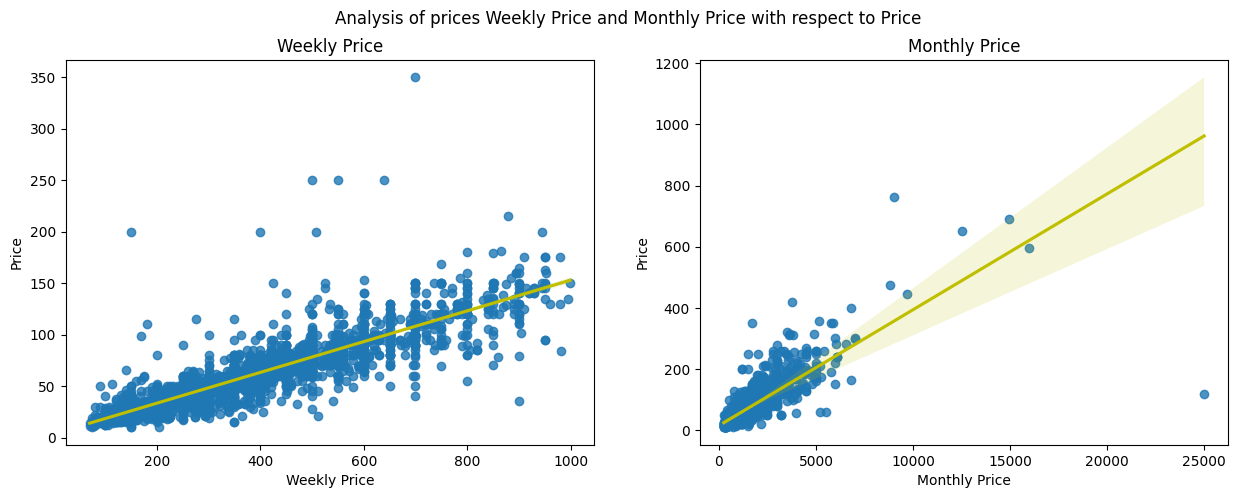

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analysis of prices Weekly Price and Monthly Price with respect to Price')
sns.regplot(ax=axes[0], data=df_train, x='Weekly Price', y='Price', line_kws=dict(color="y"))
axes[0].set_title('Weekly Price')
sns.regplot(ax=axes[1], data=df_train, x='Monthly Price', y='Price', line_kws=dict(color="y"))
axes[1].set_title('Monthly Price')

Revisar security deposit y cleaning fee debido al % de nulos

Text(0.5, 1.0, 'Cleaning Fee')

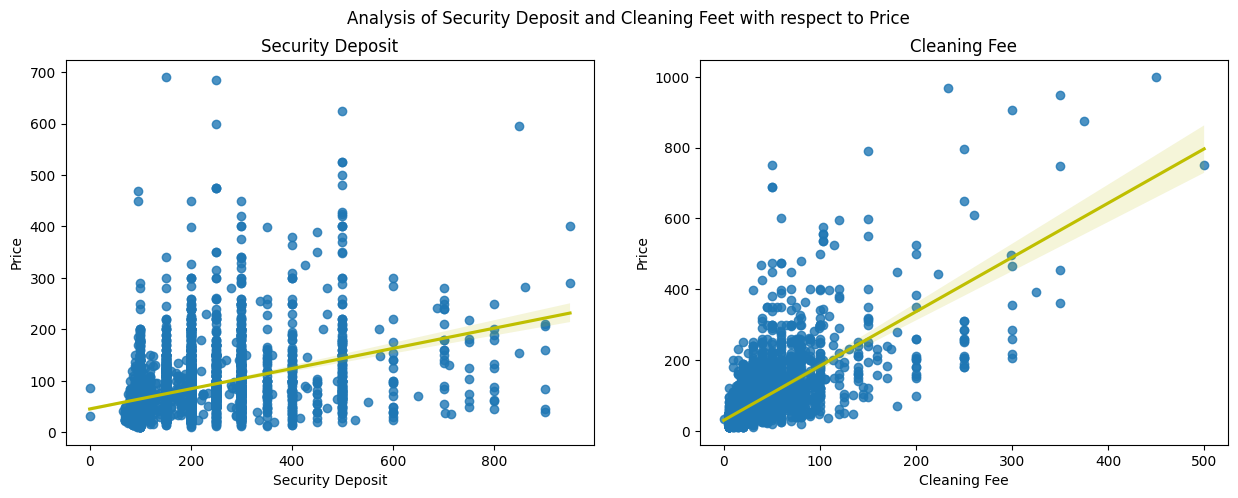

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Analysis of Security Deposit and Cleaning Feet with respect to Price')
sns.regplot(ax=axes[0], data=df_train, x='Security Deposit', y='Price', line_kws=dict(color="y"))
axes[0].set_title('Security Deposit')
sns.regplot(ax=axes[1], data=df_train, x='Cleaning Fee', y='Price', line_kws=dict(color="y"))
axes[1].set_title('Cleaning Fee')

cleaning fee la dejaré los valores nulos los voy a pasar a cero, mi lógica es que el dueño no pide esa cantidad al ya tenerla en el precio
En cuanto a security deposit no se ve ninguna tendencia

In [25]:
#Seleccionar la columna a borrar
erase_columns= ['Weekly Price','Monthly Price']

#elimnar columnas
df_train = df_train.drop(erase_columns, axis=1)

Variables Categóricas

In [26]:
# Lista de todas las columnas que son de tipo 'object'
categorical_column = df_train.select_dtypes(include=['object']).columns.tolist()
categorical_column

['Neighbourhood Cleansed',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy']

In [27]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [28]:
from category_encoders import TargetEncoder

# Inicializar TargetEncoder
encoder = TargetEncoder()

# Codificar variables categoricas
df_train[categorical_column] = encoder.fit_transform(df_train[categorical_column], df_train['Price'])

Histogramas de distribución de los datos

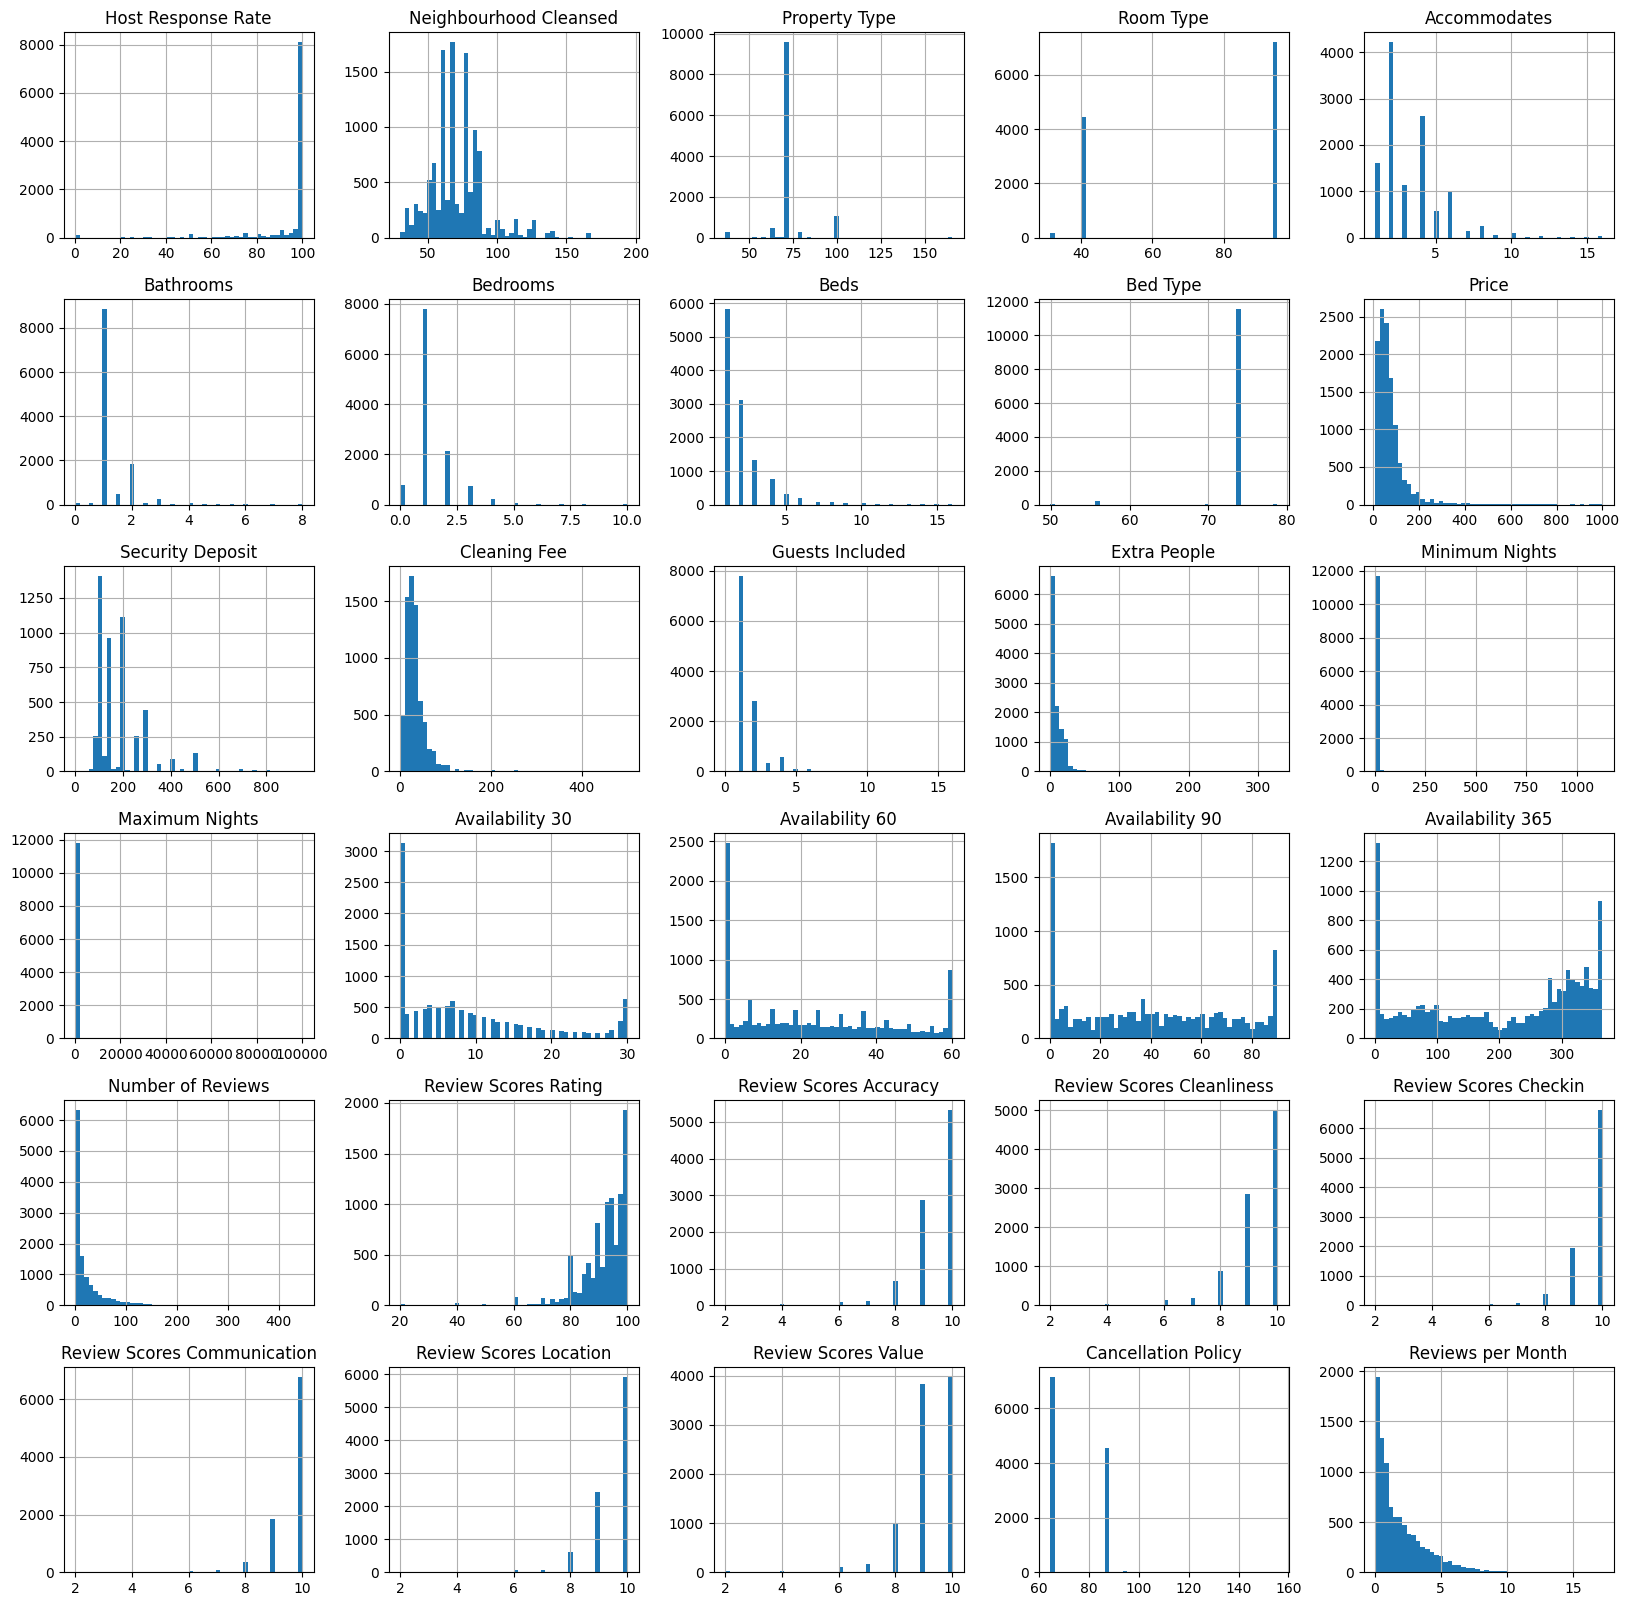

In [29]:
df_train.hist(bins=50,figsize=(20,20))
plt.show()

Se observa una gran variablidad en las gráficas entre outliers, campanas en los lados y gráficas que no siguen distribuciones

In [30]:
import seaborn as sns

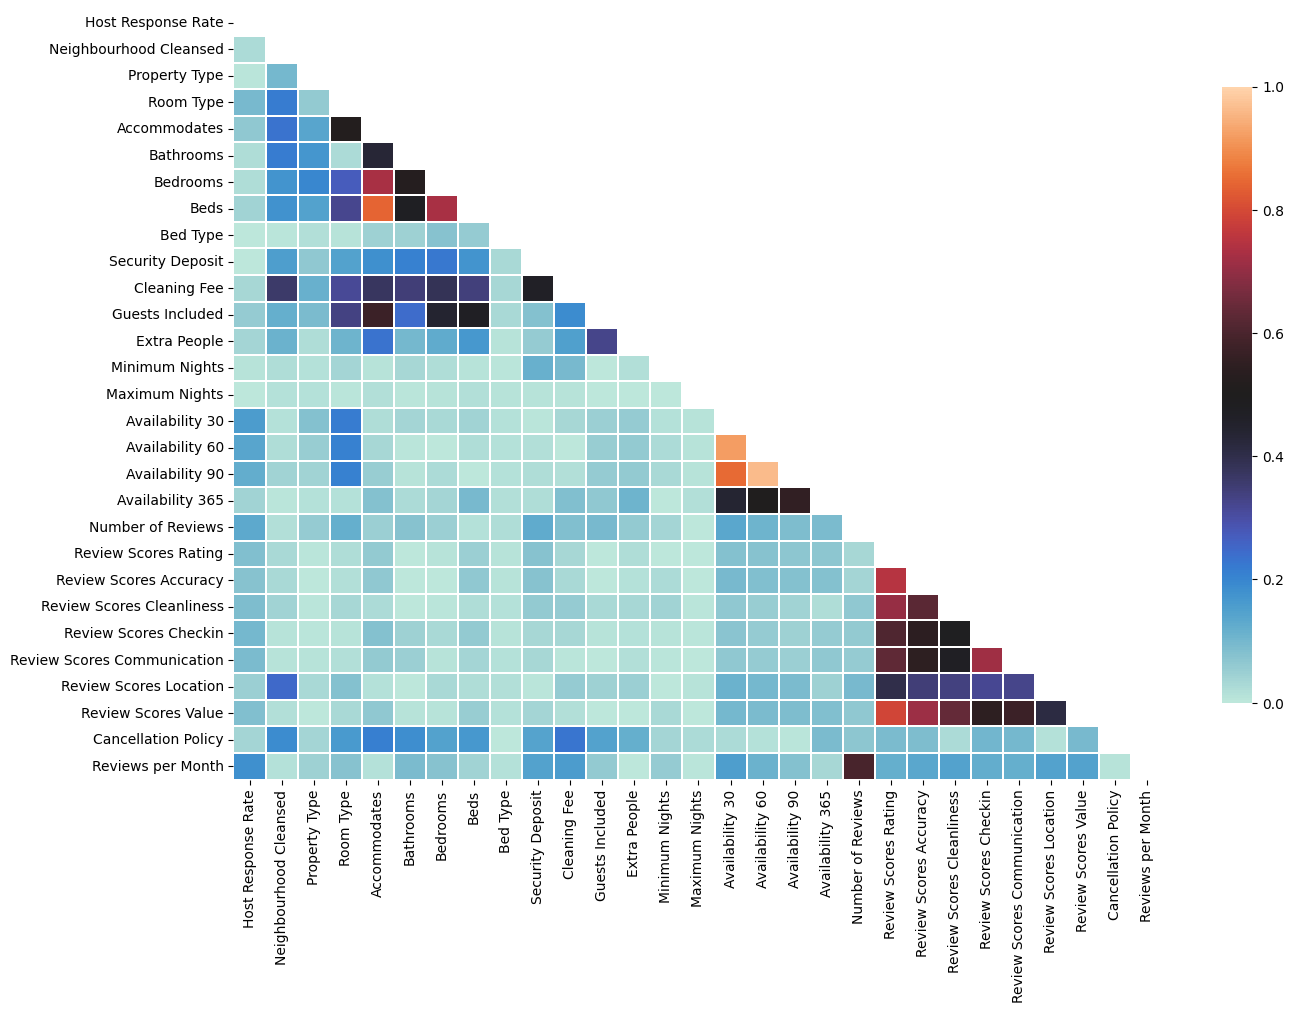

In [31]:
# calcular la matriz de relacion
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar gráfica
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="icefire", cbar_kws={"shrink": .8})
# Mostrar
plt.show()

Eliminar variables correlacionadas  
  
  
  

Se puede observar que hay una correlación fuerte entre Beds y Accommodates,también entre las columnas de reviews, además de columnas Availability y 60 Availability 90. Estas últimas las voy a eliminar  

También hay correlación entre las columnas de reviews, bedrooms y accomodates, beds y bathrooms.

In [32]:
#Seleccionar la columna a borrar
erase_columns= ['Availability 60','Availability 90']

#elimnar columnas
df_train = df_train.drop(erase_columns, axis=1)

Las columnas de reviews me pueden hacer ruido en el proceso así que las voy a eliminar y sólo me quedaré con reviews per month y Review score rating la información que hay en esas columnas es similar.

In [33]:
#Seleccionar la columna a borrar
erase_columns= ['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication','Review Scores Location', 'Review Scores Value']

#elimnar columnas
df_train = df_train.drop(erase_columns, axis=1)

Imputación de valores

La columna cleaning fee lo llenaré con ceros debido a que se supone que esa tarifa va en el precio

In [34]:
# Llenar los valores nulos en la columna 'cleaning_fee' con ceros
df_train['Cleaning Fee'].fillna(0, inplace=True)

Imputar valores nulos

In [35]:
imputer = SimpleImputer(strategy='mean')

columns_to_impute = ['Price','Host Response Rate', 'Neighbourhood Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit','Review Scores Rating','Reviews per Month']

# Aplicar el imputer a las columnas seleccionadas
df_train[columns_to_impute] = imputer.fit_transform(df_train[columns_to_impute])



In [36]:
# Obtener la cantidad total de valores por columna
total_values = df_train.shape[0]

# Calcula la cantidad de valores nulos por columna
missing_values = df_train.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
missing_percentages = (missing_values / total_values) * 100

# Redondea el porcentaje de valores nulos a dos decimales
missing_percentages_rounded = missing_percentages.round(2)

# Obtiene el tipo de dato de cada columna
data_type = df_train.dtypes

# Tabular los resultados
missing_data_summary = pd.DataFrame({
    'Total valores': total_values,
    'Total nulos': missing_values,
    '% nulos': missing_percentages_rounded,
    'Tipo': data_type
})

print(missing_data_summary)

                        Total valores  Total nulos  % nulos     Tipo
Host Response Rate              11824            0     0.00  float64
Neighbourhood Cleansed          11824            0     0.00  float64
Property Type                   11824            0     0.00  float64
Room Type                       11824            0     0.00  float64
Accommodates                    11824            0     0.00    int64
Bathrooms                       11824            0     0.00  float64
Bedrooms                        11824            0     0.00  float64
Beds                            11824            0     0.00  float64
Bed Type                        11824            0     0.00  float64
Price                           11824            0     0.00  float64
Security Deposit                11824            0     0.00  float64
Cleaning Fee                    11824            0     0.00  float64
Guests Included                 11824            0     0.00    int64
Extra People                    11

Revisión de datos para eliminar outliers

Haré de nuevo las gráficas de dispersión para ver como quedaron los datos y revisar más a detalle a partir de donde podría eliminar los outliers

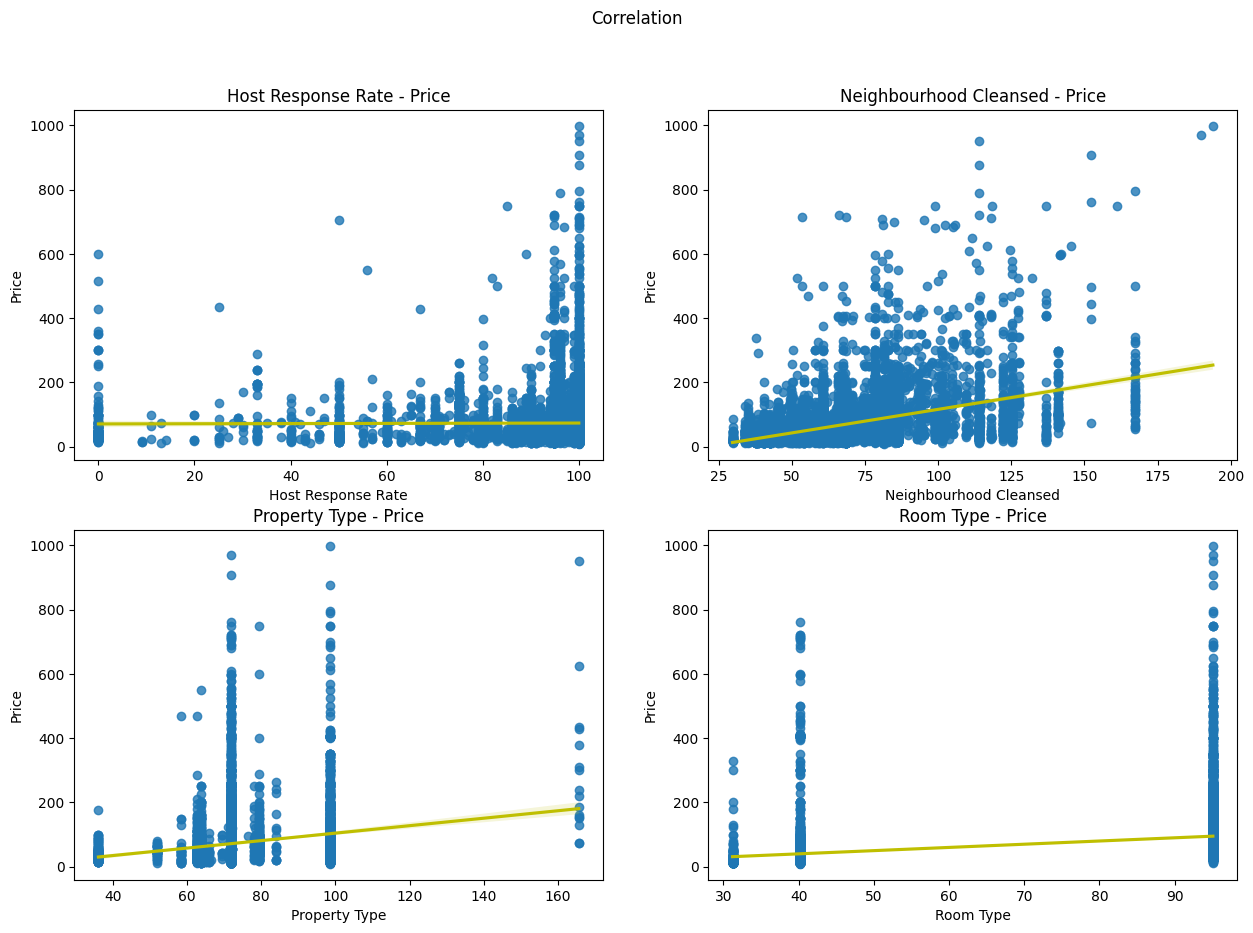

In [37]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Correlation')

sns.regplot(ax=axes[0, 0], data=df_train, x='Host Response Rate', y='Price', line_kws=dict(color="y"))
axes[0, 0].set_title('Host Response Rate - Price')

sns.regplot(ax=axes[0, 1], data=df_train, x='Neighbourhood Cleansed', y='Price', line_kws=dict(color="y"))
axes[0, 1].set_title('Neighbourhood Cleansed - Price')

sns.regplot(ax=axes[1, 0], data=df_train, x='Property Type', y='Price', line_kws=dict(color="y"))
axes[1, 0].set_title('Property Type - Price')

sns.regplot(ax=axes[1, 1], data=df_train, x='Room Type', y='Price', line_kws=dict(color="y"))
axes[1, 1].set_title('Room Type - Price')

plt.show()

En estás gráficas podría considerar sacar los outliers de neighbourhood cleansed y no perdería tantos datos, en la gráfica de host response rate se ve que entre mejor rankeado esté el host mayor precio, las otras gráficas están codificadas podría considerar property type para tomar los datos menores de 120

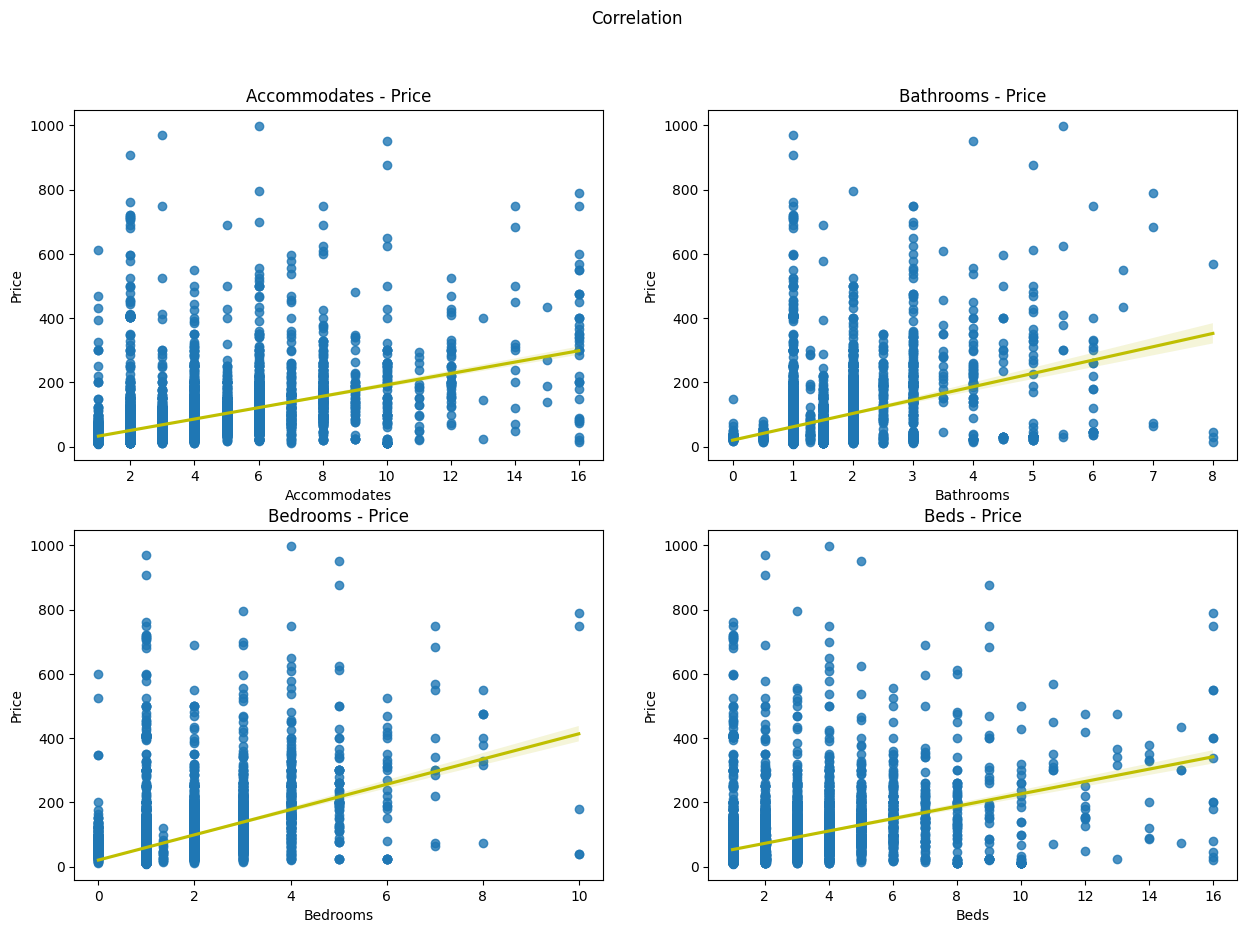

In [38]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Correlation')

sns.regplot(ax=axes[0, 0], data=df_train, x='Accommodates', y='Price', line_kws=dict(color="y"))
axes[0, 0].set_title('Accommodates - Price')

sns.regplot(ax=axes[0, 1], data=df_train, x='Bathrooms', y='Price', line_kws=dict(color="y"))
axes[0, 1].set_title('Bathrooms - Price')

sns.regplot(ax=axes[1, 0], data=df_train, x='Bedrooms', y='Price', line_kws=dict(color="y"))
axes[1, 0].set_title('Bedrooms - Price')

sns.regplot(ax=axes[1, 1], data=df_train, x='Beds', y='Price', line_kws=dict(color="y"))
axes[1, 1].set_title('Beds - Price')

plt.show()

En estas gráficas se encuentran los datos muy dispersos no veo que sigan una tendencia los outliers serían  
bedrooms menores de 9  
bathrooms menores de 7

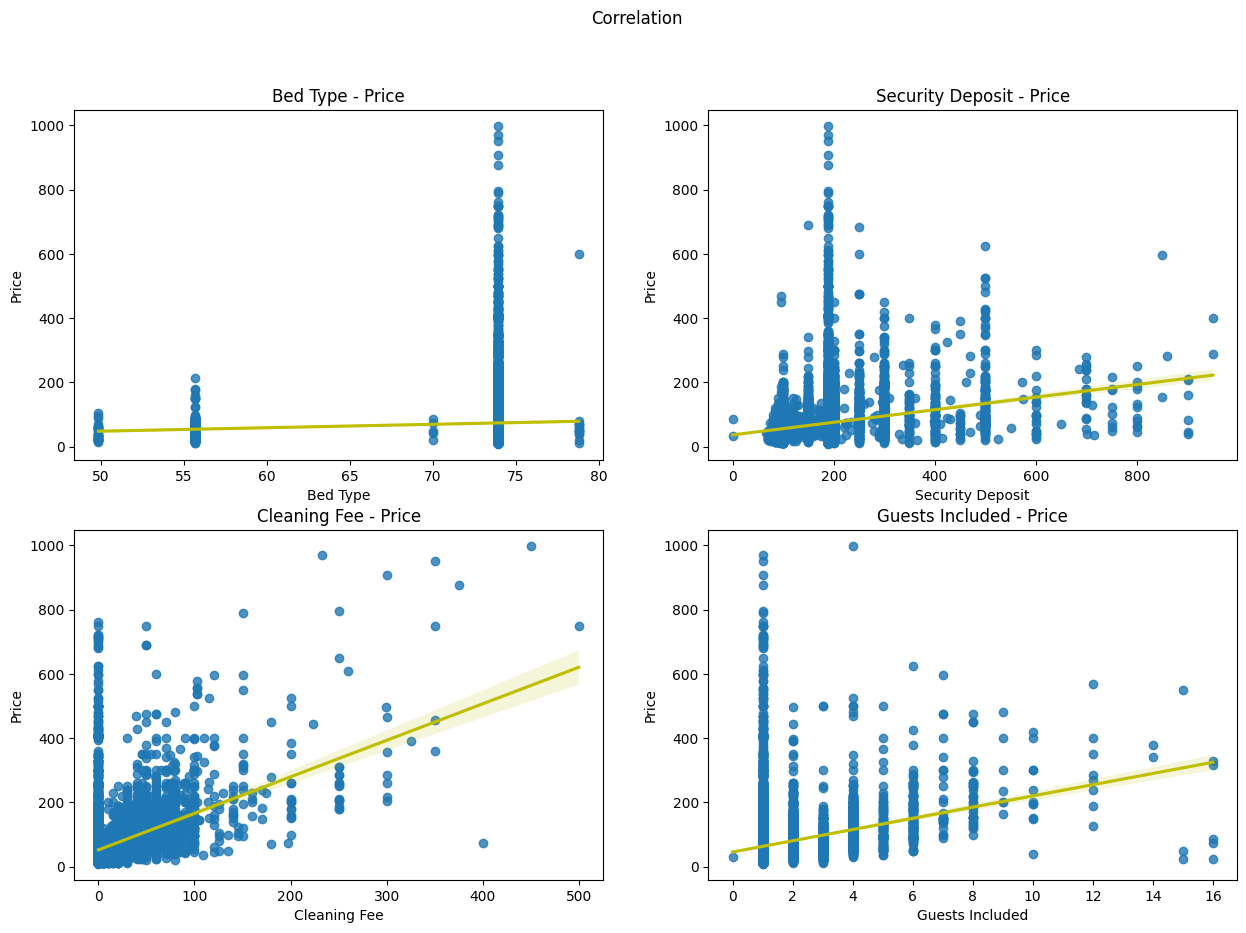

In [39]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Correlation')

sns.regplot(ax=axes[0, 0], data=df_train, x='Bed Type', y='Price', line_kws=dict(color="y"))
axes[0, 0].set_title('Bed Type - Price')

sns.regplot(ax=axes[0, 1], data=df_train, x='Security Deposit', y='Price', line_kws=dict(color="y"))
axes[0, 1].set_title('Security Deposit - Price')

sns.regplot(ax=axes[1, 0], data=df_train, x='Cleaning Fee', y='Price', line_kws=dict(color="y"))
axes[1, 0].set_title('Cleaning Fee - Price')

sns.regplot(ax=axes[1, 1], data=df_train, x='Guests Included', y='Price', line_kws=dict(color="y"))
axes[1, 1].set_title('Guests Included - Price')

plt.show()

*Bed type columna codificada  
*Security deposit si se ve una campana en el limite izquierdo por 200, el outlier sería menores a 800   
*Fue llenada con medias los ceros por eso la cantidad de nulos ahí el outliers podría revisar con datos menores de 300 a 400  
*Guest included de menores a 12


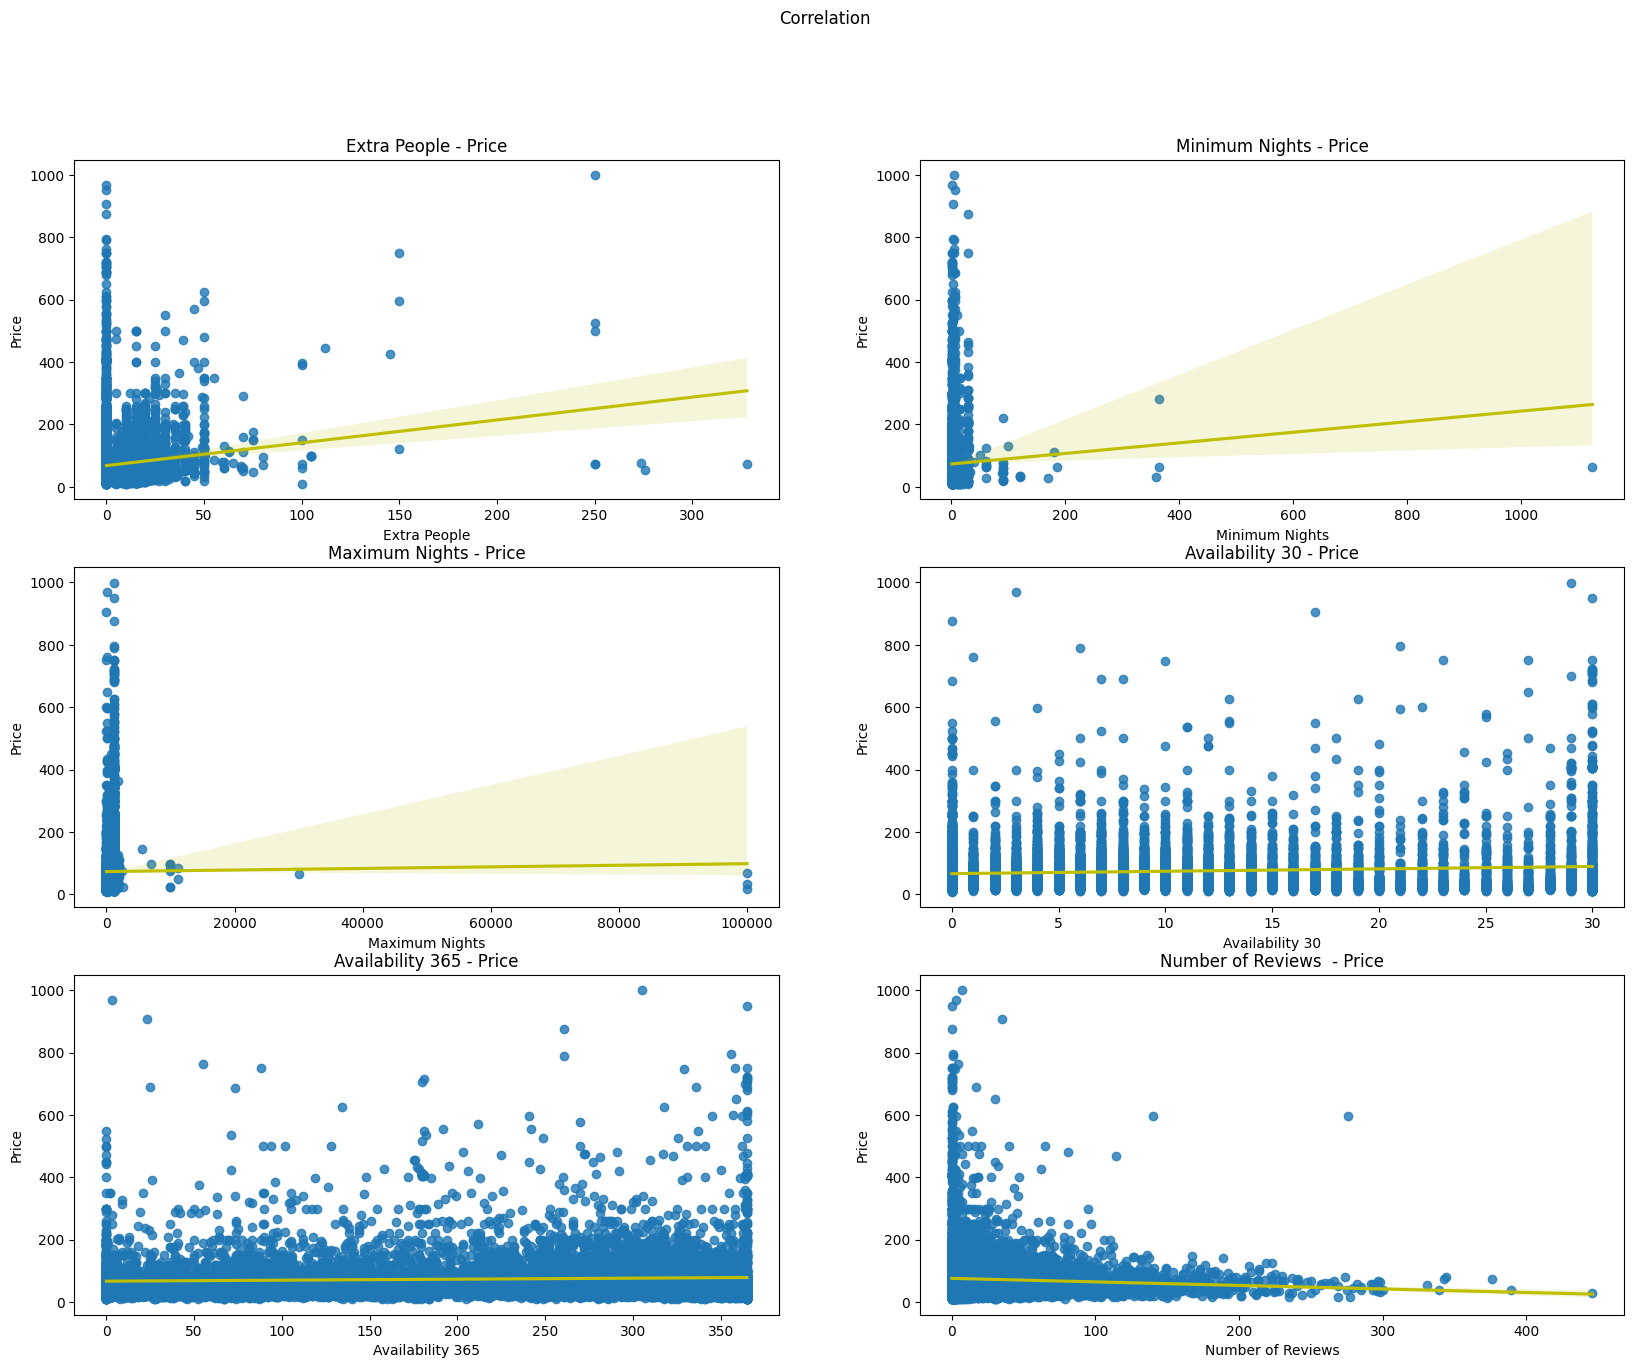

In [40]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Correlation')

sns.regplot(ax=axes[0, 0], data=df_train, x='Extra People', y='Price', line_kws=dict(color="y"))
axes[0, 0].set_title('Extra People - Price')

sns.regplot(ax=axes[0, 1], data=df_train, x='Minimum Nights', y='Price', line_kws=dict(color="y"))
axes[0, 1].set_title('Minimum Nights - Price')

sns.regplot(ax=axes[1, 0], data=df_train, x='Maximum Nights', y='Price', line_kws=dict(color="y"))
axes[1, 0].set_title('Maximum Nights - Price')

sns.regplot(ax=axes[1, 1], data=df_train, x='Availability 30', y='Price', line_kws=dict(color="y"))
axes[1, 1].set_title('Availability 30 - Price')

sns.regplot(ax=axes[2, 0], data=df_train, x='Availability 365', y='Price', line_kws=dict(color="y"))
axes[2, 0].set_title('Availability 365 - Price')

sns.regplot(ax=axes[2, 1], data=df_train, x='Number of Reviews', y='Price', line_kws=dict(color="y"))
axes[2, 1].set_title('Number of Reviews  - Price')

plt.show()

En estas gráficas se pueden hacer varios cortes sin considerar las gráficas de availability  
*Extra people menores de 100  
*Minimum night menores de 200
*Maximum nights voy a borrar la columna  
*Number of reviews menores a 350

Text(0.5, 1.0, 'Cancellation Policy - Price')

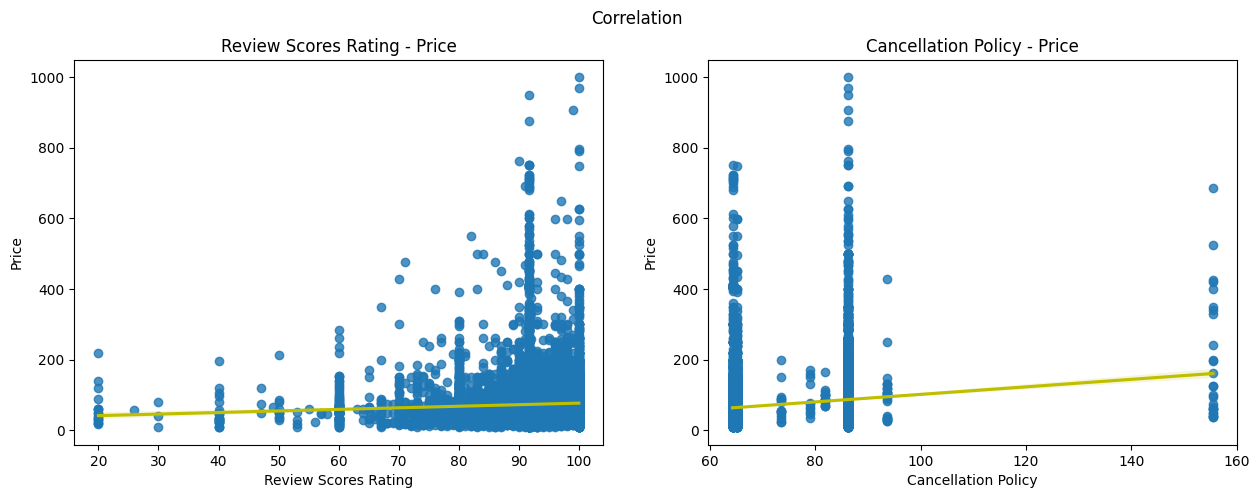

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Correlation')
sns.regplot(ax=axes[0], data=df_train, x='Review Scores Rating', y='Price', line_kws=dict(color="y"))
axes[0].set_title('Review Scores Rating - Price')
sns.regplot(ax=axes[1], data=df_train, x='Cancellation Policy', y='Price', line_kws=dict(color="y"))
axes[1].set_title('Cancellation Policy - Price')

Review score rating forma la mitad de una campana el corte podría considerar en 30  
cancellation policy se queda igual

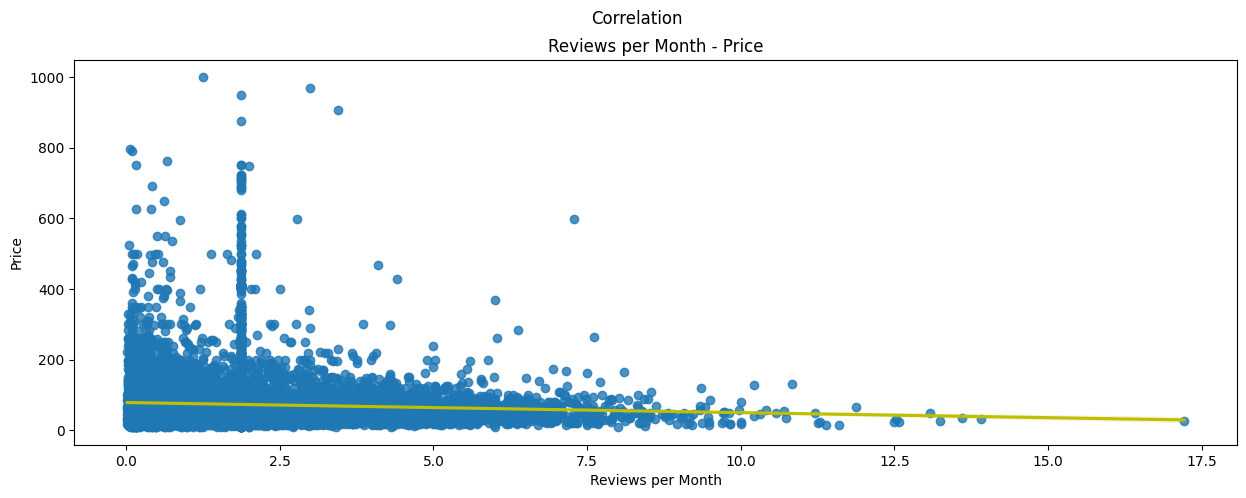

In [42]:
#Dispersión de las columnas Availability
fig, axes = plt.subplots(figsize=(15,5))
fig.suptitle('Correlation')

sns.regplot(data=df_train, x='Reviews per Month', y='Price', line_kws=dict(color="y"))
axes.set_title('Reviews per Month - Price')

plt.show()

Corte en 10 - 10.5 aprox  

no haré todos los cortes mencionados sólo son donde podrían ser, si realizo todos perdería muchos datos, por como se observan las gráficas quitaré outliers en Minimum Nights por la concentración de datos que se ven juntas cerca del cero

In [43]:
outliers_min_night = df_train[df_train['Minimum Nights'] <=50]

print(
    f'Original: {df_train.shape[0]} // '
    f'Modificado: {outliers_min_night.shape[0]}\nDiferencia: {df_train.shape[0] - outliers_min_night.shape[0]}'
)
print(f'Variación: {(((df_train.shape[0] - outliers_min_night.shape[0])/df_train.shape[0])*100):.2f}%')

Original: 11824 // Modificado: 11794
Diferencia: 30
Variación: 0.25%


In [44]:
# Eliminar outliers en el df
df_train = df_train[df_train['Minimum Nights']<50]

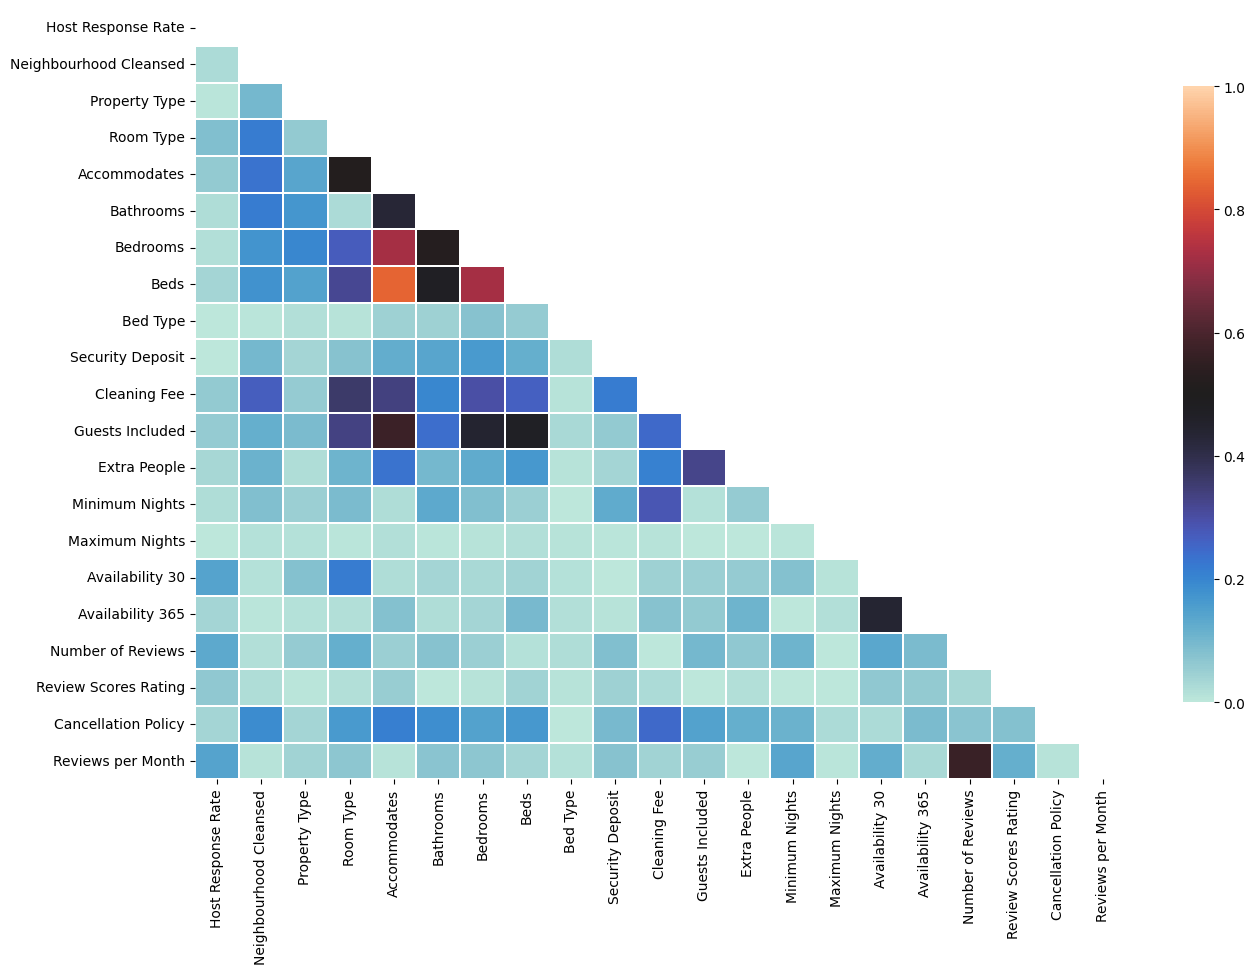

In [45]:
# calcular la matriz de relacion
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Configurar gráfica
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="icefire", cbar_kws={"shrink": .8})
# Mostrar
plt.show()

Hay correlación entre  
*bedrooms y accomodates  
*beds y accomodates  
*beds y bedrooms    
para no borrarlas puedo hacer una nueva variable

In [46]:
# Camas entre comodidades
df_train['beds_accommodates'] = df_train['Beds'] / df_train['Accommodates']
# Habitaciones al cuadrado
df_train['bedrooms_squared'] = df_train['Bedrooms'].apply(lambda x: x**2)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11793 entries, 0 to 11823
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Host Response Rate      11793 non-null  float64
 1   Neighbourhood Cleansed  11793 non-null  float64
 2   Property Type           11793 non-null  float64
 3   Room Type               11793 non-null  float64
 4   Accommodates            11793 non-null  int64  
 5   Bathrooms               11793 non-null  float64
 6   Bedrooms                11793 non-null  float64
 7   Beds                    11793 non-null  float64
 8   Bed Type                11793 non-null  float64
 9   Price                   11793 non-null  float64
 10  Security Deposit        11793 non-null  float64
 11  Cleaning Fee            11793 non-null  float64
 12  Guests Included         11793 non-null  int64  
 13  Extra People            11793 non-null  int64  
 14  Minimum Nights          11793 non-null  int

Train

In [48]:
# ------------>  Cargar datos de train
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

# ------------>  Eliminar columnas
#Seleccionar la columna a borrar
erase_column= ['Street','City','State','Zipcode','Market','Country Code',
                 'Latitude','Longitude','Geolocation','Host Total Listings Count',
                 'Square Feet','Smart Location','Amenities', 'Calculated host listings count',
                 'Weekly Price','Monthly Price','Availability 60','Availability 90','Review Scores Accuracy',
                 'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
                 'Review Scores Location', 'Review Scores Value']
#elimnar columnas
df_train = df_train.drop(erase_column, axis=1)

# ------------> Codificación
# Inicializar TargetEncoder
encoder = TargetEncoder()

# Codificar variables categoricas
df_train[categorical_column] = encoder.fit_transform(df_train[categorical_column], df_train['Price'])

#------------>  Imputar valores
# Llenar los valores nulos en la columna 'cleaning_fee' con ceros
df_train['Cleaning Fee'].fillna(0, inplace=True)

imputer = SimpleImputer(strategy='mean')

# Seleccionar columnas a imputar
columns_to_impute = ['Price','Host Response Rate', 'Neighbourhood Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit','Review Scores Rating','Reviews per Month']

# Aplicar el imputer a las columnas seleccionadas
df_train[columns_to_impute] = imputer.fit_transform(df_train[columns_to_impute])

#------------> Eliminar outliers
# Eliminar outliers en el df
df_train = df_train[df_train['Minimum Nights']<50]

#------------> Caracteristicas
# Camas entre comodidades
df_train['beds_accommodates'] = df_train['Beds'] / df_train['Accommodates']
# Habitaciones al cuadrado
df_train['bedrooms_squared'] = df_train['Bedrooms'].apply(lambda x: x**2)

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11793 entries, 0 to 11823
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Host Response Rate      11793 non-null  float64
 1   Neighbourhood Cleansed  11793 non-null  float64
 2   Property Type           11793 non-null  float64
 3   Room Type               11793 non-null  float64
 4   Accommodates            11793 non-null  int64  
 5   Bathrooms               11793 non-null  float64
 6   Bedrooms                11793 non-null  float64
 7   Beds                    11793 non-null  float64
 8   Bed Type                11793 non-null  float64
 9   Price                   11793 non-null  float64
 10  Security Deposit        11793 non-null  float64
 11  Cleaning Fee            11793 non-null  float64
 12  Guests Included         11793 non-null  int64  
 13  Extra People            11793 non-null  int64  
 14  Minimum Nights          11793 non-null  int

In [50]:
df_train.shape

(11793, 24)

Test

In [51]:
# ------------>  Cargar datos de train
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# ------------>  Eliminar columnas
#Seleccionar la columna a borrar
erase_column= ['Street','City','State','Zipcode','Market','Country Code',
                 'Latitude','Longitude','Geolocation','Host Total Listings Count',
                 'Square Feet','Smart Location','Amenities', 'Calculated host listings count',
                 'Weekly Price','Monthly Price','Availability 60','Availability 90','Review Scores Accuracy',
                 'Review Scores Cleanliness','Review Scores Checkin', 'Review Scores Communication',
                 'Review Scores Location', 'Review Scores Value']
#elimnar columnas
df_test = df_test.drop(erase_column, axis=1)


# ------------> Codificación
# Inicializar TargetEncoder
encoder = TargetEncoder()

# Codificar variables categoricas
df_test[categorical_column] = encoder.fit_transform(df_test[categorical_column], df_test['Price'])



#------------>  Imputar valores
# Llenar los valores nulos en la columna 'cleaning_fee' con ceros
df_test['Cleaning Fee'].fillna(0, inplace=True)

imputer = SimpleImputer(strategy='mean')

# Seleccionar columnas a imputar
columns_to_impute = ['Price','Host Response Rate', 'Neighbourhood Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit','Review Scores Rating','Reviews per Month']

# Aplicar el imputer a las columnas seleccionadas
df_test[columns_to_impute] = imputer.fit_transform(df_test[columns_to_impute])



#------------> Eliminar outliers
# Eliminar outliers en el df
df_test = df_test[df_test['Minimum Nights']<50]



#------------> Caracteristicas
# Camas entre comodidades
df_test['beds_accommodates'] = df_test['Beds'] / df_test['Accommodates']
# Habitaciones al cuadrado
df_test['bedrooms_squared'] = df_test['Bedrooms'].apply(lambda x: x**2)



In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2949 entries, 0 to 2955
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Host Response Rate      2949 non-null   float64
 1   Neighbourhood Cleansed  2949 non-null   float64
 2   Property Type           2949 non-null   float64
 3   Room Type               2949 non-null   float64
 4   Accommodates            2949 non-null   int64  
 5   Bathrooms               2949 non-null   float64
 6   Bedrooms                2949 non-null   float64
 7   Beds                    2949 non-null   float64
 8   Bed Type                2949 non-null   float64
 9   Price                   2949 non-null   float64
 10  Security Deposit        2949 non-null   float64
 11  Cleaning Fee            2949 non-null   float64
 12  Guests Included         2949 non-null   int64  
 13  Extra People            2949 non-null   int64  
 14  Minimum Nights          2949 non-null   int64

In [53]:
df_test.shape

(2949, 24)

Preparar datos para sklearn

In [54]:
from sklearn import preprocessing

In [55]:
# Dataset de train
df_columns = df_train.columns.drop(['Price'])

y_train = df_train['Price'].values
X_train = df_train[df_columns].values

# Dataset de test

y_test = df_test['Price'].values
X_test = df_test[df_columns].values

print('Datos de  entrenamiento: ', X_train.shape)
print('Datos de test: ', X_test.shape)

Datos de  entrenamiento:  (11793, 23)
Datos de test:  (2949, 23)


Normalizar

In [56]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

print('Datos de entrenamiento: ', XtrainScaled.shape)
print('Datos de test: ', XtestScaled.shape)

Datos de entrenamiento:  (11793, 23)
Datos de test:  (2949, 23)


## Lasso

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................alpha=0.09999999999999999; total time=   0.0s
[CV] END ..........................alpha=0.09999999999999999; total time=   0.0s
[CV] END ..........................alpha=0.09999999999999999; total time=   0.0s
[CV] END ............................alpha=0.379269019073225; total time=   0.0s
[CV] END ............................alpha=0.379269019073225; total time=   0.0s
[CV] END ............................alpha=0.379269019073225; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

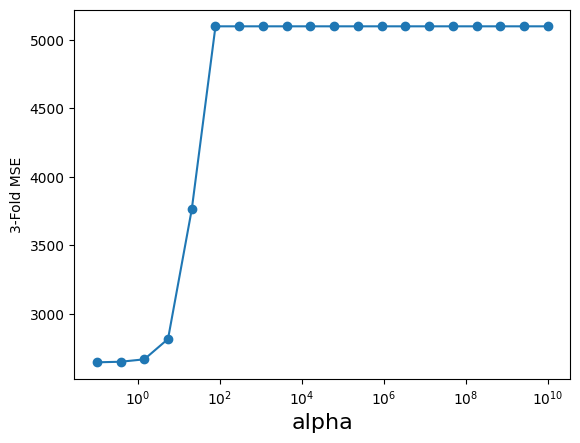

In [58]:
alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
# plt.ylim((0, 0.5))
plt.show()

Para valores altos el modelo simplifica mucho, y para los valores pequeños la regularización se considera buena, el mejor valor podría ser 0.1 (10^1).

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = df_train.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 2.62e+03
MSE Modelo Lasso (test) : 2.89e+03
RMSE Modelo Lasso (train): 51.2
RMSE Modelo Lasso (test) : 53.8
Neighbourhood Cleansed -0.8091079626000772
Property Type 15.511147138445235
Room Type 2.634723773844374
Accommodates 11.027127347265187
Bathrooms 16.24466041532392
Bedrooms 8.072991591260687
Beds 3.7491192540521845
Bed Type -5.540539605468191
Price 0.9766751777239943
Security Deposit 4.343897509165417
Cleaning Fee 14.970992851962079
Guests Included -1.6450727527431068
Extra People -1.6901033979688056
Minimum Nights -0.3908856729596712
Maximum Nights -0.1679236327768594
Availability 30 9.812484163195204
Availability 365 -1.8610711941074578
Number of Reviews -2.4831274927318736
Review Scores Rating 3.8857222661589685
Cancellation Policy -1.4041696047285688
Reviews per Month -0.906621195182446
beds_accommodates 0.08691127655665734
bedrooms_squared 9.782692977216454


Comentario:  
Las variables como tipo de propiedad, cantidad de baños y la tarifa de limpieza tienen impactos positivos mientras que el tipo de cama y las políticas de cancelación tienen impactos negativos.  
Las métricas de MSE y RMSE se ajusta bien a los datos de train y test, aunque puede haber overfitting

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

best mean cross-validation score: 0.593
best parameters: {'max_depth': 11}


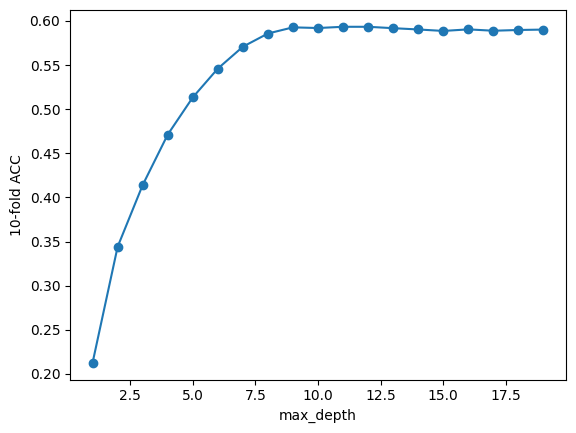

In [63]:
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

# grid = GridSearchCV(RandomForestRegressor(random_state=42, n_stimators=200), param_grid=tuned_parameters, cv=5, verbose=2).fit(X_train, y_train)
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200), param_grid=tuned_parameters, cv=5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Comentario:  
El mejor punto de max_depth es 11 con unpunto de precisión de validación cruzada de 0.593.  
Para los valores menores a 5 (max_depth) la precisión es baja y no captura bien los datos considerando un subajuste.

In [64]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8168012598539709
Test:  0.6303766608866979


Comentario:  
El modelo explica el 81.68% de datos de train, se ajusta bien a los datos  
en test 63.03% al ser menor que train hay algo de overtfitting

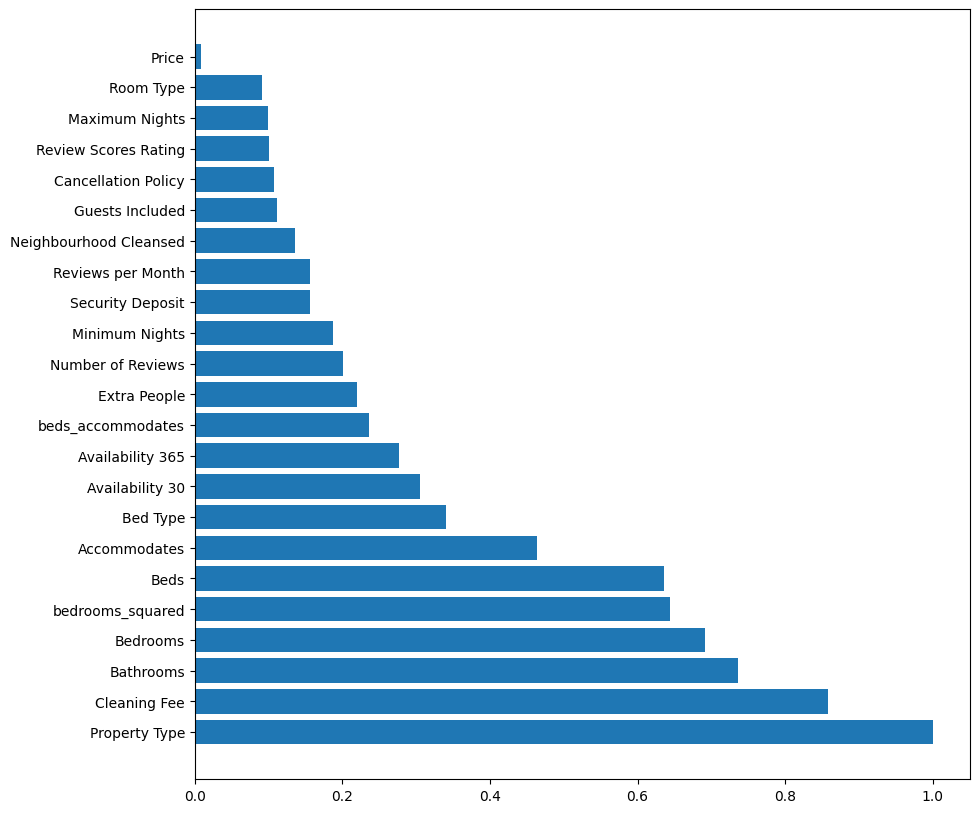

In [66]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Comentario:  
*Caracteristicas más importantes:  


*   Property type
*   Cleaning Fee
*   Bathrooms
*   Bedrooms
*   Bedrooms Squared
*   Elemento de la lista


El modelo no generaliza bien los datos nuevos, el modelo puede mejorar.




##Bagging regressor

In [67]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.9s
[CV] END ........................base_estimator__max_depth=1; total time=   1.0s
[CV] END ........................base_estimator__max_depth=1; total time=   1.5s
[CV] END ........................base_estimator__max_depth=2; total time=   4.4s
[CV] END ........................base_estimator__max_depth=2; total time=   2.3s
[CV] END ........................base_estimator__max_depth=2; total time=   1.5s
[CV] END ........................base_estimator__max_depth=3; total time=   1.9s
[CV] END ........................base_estimator__max_depth=3; total time=   2.4s
[CV] END ........................base_estimator__max_depth=3; total time=   3.0s
[CV] END ........................base_estimator__max_depth=4; total time=   3.4s
[CV] END ........................base_estimator__max_depth=4; total time=   2.4s
[CV] END ........................base_estimator_

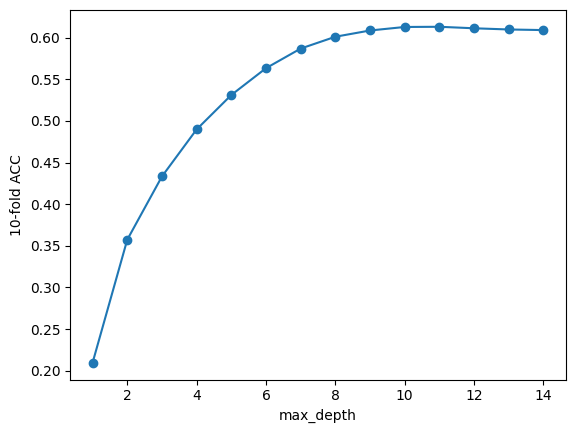

In [68]:
maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters, cv=3, verbose=2)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [69]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.8590604239332879
Test:  0.5602549291037733


Comentario:  
La mejor precisión media obtenida fue de 0.613 en max_depth 11  

Despues de 8 la gráfica se empieza a estabilizar después de ahí se manteiente, al tener una alta precisión en train a comparación de test se sugiere overfitting.


## Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   7.4s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   6.1s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   7.3s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  14.7s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  13.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  13.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  19.5s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  22.3s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  19.9s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  27.1s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  27.0s
[CV] END ...............learning_rate=0.1, n_esti

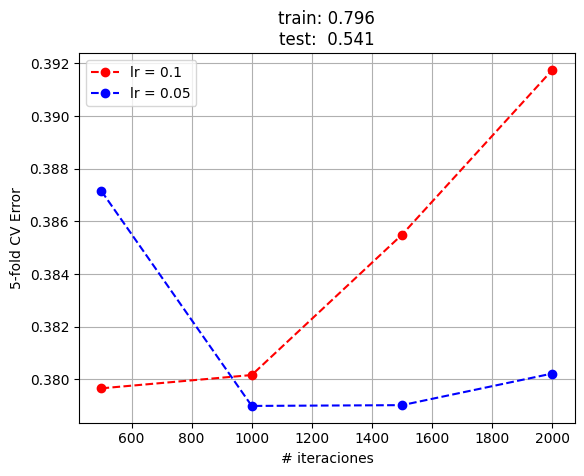

In [72]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [73]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.7960900843297507
Test:  0.540937653062525


Comentario:  
Mejor precision media en 0.621  
los mejores parametros son:  
*learning rate* = 0.05  
*n_stimators* = 1000  
  

En train alcanza una precisión de 0.796 y en test 0.541.  


En la gráfica se muestran dos tazas de aprendiaje  
en lr = 0.1 la validación cruzada aumenta después de 1000, en otras palabras hay overfitting  
en lr = 0.05 el error de validación cruzada disminuye alcanzando el valor mínimo en 1000 y luego tiene un pequeño aumento, pero más bajo que la otra taza de aprendizaje.

